In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [91]:
target_latency = 155

In [92]:
# local_df = pd.read_csv("../measurements/local_long/map.csv")
# root_folder = "../measurements/direct_split_quantize/"
# mag_folder = "../measurements_vidvrd/test_ltl_15/"

local_df = pd.read_csv("../measurements_vidvrd/local_test/map.csv")
root_folder = "../measurements_vidvrd/direct_split/"
mag_folder = "../measurements_vidvrd/test_ltl_15_1/"

# local_df = pd.read_csv("../measurements_bev/local_test/map.csv")
# root_folder = "../measurements_bev/direct_split_quantize/"
# mag_folder = "../measurements_bev/test_ltl_15/"


map_df = pd.read_csv(root_folder+"map.csv")
cha_df = pd.read_csv(mag_folder+"characteristic.csv")
mag_df = pd.read_csv(mag_folder+"manager.csv")
tim_df = pd.read_csv(root_folder+"time.csv")

In [93]:
map_df

,pruning_thresh,quality,technique,frame_id,datasize,sensitivity,map
0,0,0,0,1,346541,1.0,1.000000
1,0,0,0,2,346541,1.0,1.000000
2,0,0,0,3,346541,1.0,1.000000
3,0,0,0,4,346541,1.0,1.000000
4,0,0,0,5,346541,1.0,0.942857
...,...,...,...,...,...,...,...
395,0,0,0,396,346541,0.5,0.500000
396,0,0,0,397,346541,0.5,0.500000
397,0,0,0,398,346541,0.5,0.500000
398,0,0,0,399,346541,0.5,0.500000


In [94]:
tim_df

,frame_id,head_time,serialize_time,tail_time
0,1,6112.192871,3.544224,2693.724121
1,2,10.530208,2.211392,12.310176
2,3,10.331296,1.384864,11.885792
3,4,10.452224,1.210112,11.929536
4,5,10.269920,1.397792,11.995104
...,...,...,...,...
395,396,10.299296,1.015232,11.891488
396,397,10.219040,1.020384,11.900640
397,398,10.267904,1.038624,11.870624
398,399,10.246688,1.034208,11.916160


In [95]:
drops = []

for i in range(400):
    try:
        d = mag_df[mag_df["frame_id"]==i+1]["drop"].tolist()[0]
        if d >0.4:
            d=0.4
        drops.append(d)
    except:
        drops.append(drops[-1])


df = pd.DataFrame()
df["traget_drops"] = drops

In [96]:
df["map_drop"] = local_df["map"] - map_df["map"]
df["sen_drop"] = local_df["sensitivity"] - map_df["sensitivity"]

In [97]:
df["bandwidth"] = cha_df["bandwidth"]

In [98]:
tim_df["head_est"] = tim_df["head_time"]*10
tim_df["ser_est"] = tim_df["serialize_time"]*10
tim_df["tran_est"] = (target_latency - tim_df["head_est"] - tim_df["ser_est"] - tim_df["tail_time"])/1000 # last is the edge time
df["bw_com"] = map_df["datasize"]/tim_df["tran_est"]

In [99]:
tim_df

,frame_id,head_time,serialize_time,tail_time,head_est,ser_est,tran_est
0,1,6112.192871,3.544224,2693.724121,61121.928711,35.442240,-63.696095
1,2,10.530208,2.211392,12.310176,105.302076,22.113919,0.015274
2,3,10.331296,1.384864,11.885792,103.312960,13.848640,0.025953
3,4,10.452224,1.210112,11.929536,104.522238,12.101120,0.026447
4,5,10.269920,1.397792,11.995104,102.699203,13.977920,0.026328
...,...,...,...,...,...,...,...
395,396,10.299296,1.015232,11.891488,102.992964,10.152320,0.029963
396,397,10.219040,1.020384,11.900640,102.190399,10.203840,0.030705
397,398,10.267904,1.038624,11.870624,102.679043,10.386240,0.030064
398,399,10.246688,1.034208,11.916160,102.466879,10.342081,0.030275


In [100]:
df = df[200:]

In [101]:
df

,traget_drops,map_drop,sen_drop,bandwidth,bw_com
200,0.4,0.0,0.0,9000000.0,1.194878e+07
201,0.4,0.0,0.0,9000000.0,1.215676e+07
202,0.4,0.0,0.0,9000000.0,1.150032e+07
203,0.4,0.0,0.0,9000000.0,1.187524e+07
204,0.4,0.0,0.0,9000000.0,1.127430e+07
...,...,...,...,...,...
395,0.4,0.0,0.0,9000000.0,1.156554e+07
396,0.4,0.0,0.0,9000000.0,1.128610e+07
397,0.4,0.0,0.0,9000000.0,1.152674e+07
398,0.4,0.0,0.0,9000000.0,1.144649e+07


(0.0, 30.0)

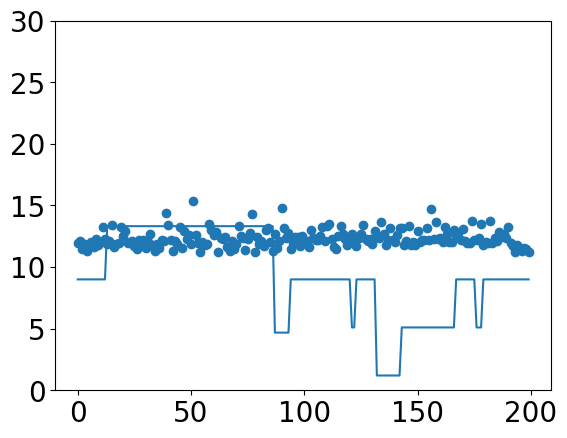

In [102]:
plt.plot(np.arange(200),df["bandwidth"]/1e6)
plt.scatter(np.arange(200),df["bw_com"]/1e6)
plt.ylim([0,30])

In [103]:
good_df = df[df["map_drop"]<df["traget_drops"]]
good_df= good_df[good_df["sen_drop"]<good_df["traget_drops"]]
good_df= good_df[good_df["bw_com"]<good_df["bandwidth"]]
# good_df= good_df[good_df["overall_time"]<target_latency]

In [104]:
good_df

,traget_drops,map_drop,sen_drop,bandwidth,bw_com
213,0.4,0.0,0.0,13320000.0,1.189036e+07
214,0.4,0.0,0.0,13320000.0,1.213488e+07
216,0.4,0.0,0.0,13320000.0,1.163421e+07
217,0.4,0.0,0.0,13320000.0,1.184379e+07
218,0.4,0.0,0.0,13320000.0,1.198592e+07
...,...,...,...,...,...
282,0.2,0.0,0.0,13320000.0,1.169641e+07
283,0.2,0.0,0.0,13320000.0,1.297070e+07
284,0.2,0.0,0.0,13320000.0,1.315775e+07
285,0.2,0.0,0.0,13320000.0,1.201666e+07


In [105]:
len(good_df)/200

0.335